In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
data = pd.read_csv('Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [4]:
data = data.drop_duplicates()
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [5]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


In [6]:
#Trouble with this discretiser, get an error based on feature_engine
#from feature_engine.discretisation import DecisionTreeDiscretiser

In [7]:
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [8]:
#discretizer = EqualFrequencyDiscretiser(q=5, variables = ['age'])
#data.discretizer()

In [9]:
#Didn't Work right
#discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans', variables = 'age')

In [10]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [11]:
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

In [12]:
#group_X = ['in-store', 'items', 'amount', 'region']
#group_y = ['age']
#new_cols = group_X+group_y

In [13]:
#set(daa.columns) == set(new_cols)

In [14]:
#data_df_2 = data_df(new_cols)


In [15]:
#features data, X/independent variables
X = data.iloc[:,[0,2,3,4]]
X.head()

,in-store,items,amount,region
0,0,4,281.03,2
1,0,2,219.51,2
2,1,3,1525.70,4
3,1,3,715.25,3
4,1,4,1937.50,1


In [16]:
#dependent variable/y
#y = data.iloc[:,5:5] Doesn't work, nor does 
#y = data[5:4]
y = pd.qcut(data['age'],q=2, labels=[0,1])
y.head()

0    0
1    0
2    0
3    1
4    0
Name: age, dtype: category
Categories (2, int64): [0 < 1]

In [17]:
y.tail()

79995    1
79996    1
79997    1
79998    1
79999    0
Name: age, dtype: category
Categories (2, int64): [0 < 1]

In [18]:
#Splitting data for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=123)

In [19]:
#modeling (classification)
algo = DecisionTreeClassifier("entropy", "random", 3, 2)
model = algo.fit(X_train, y_train)

/home/pyrot/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass criterion=entropy, splitter=random, max_depth=3, min_samples_split=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [20]:
#predictions
preds = model.predict(X_test)

In [21]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68     12529
           1       0.65      0.52      0.58     11465

    accuracy                           0.64     23994
   macro avg       0.64      0.63      0.63     23994
weighted avg       0.64      0.64      0.63     23994



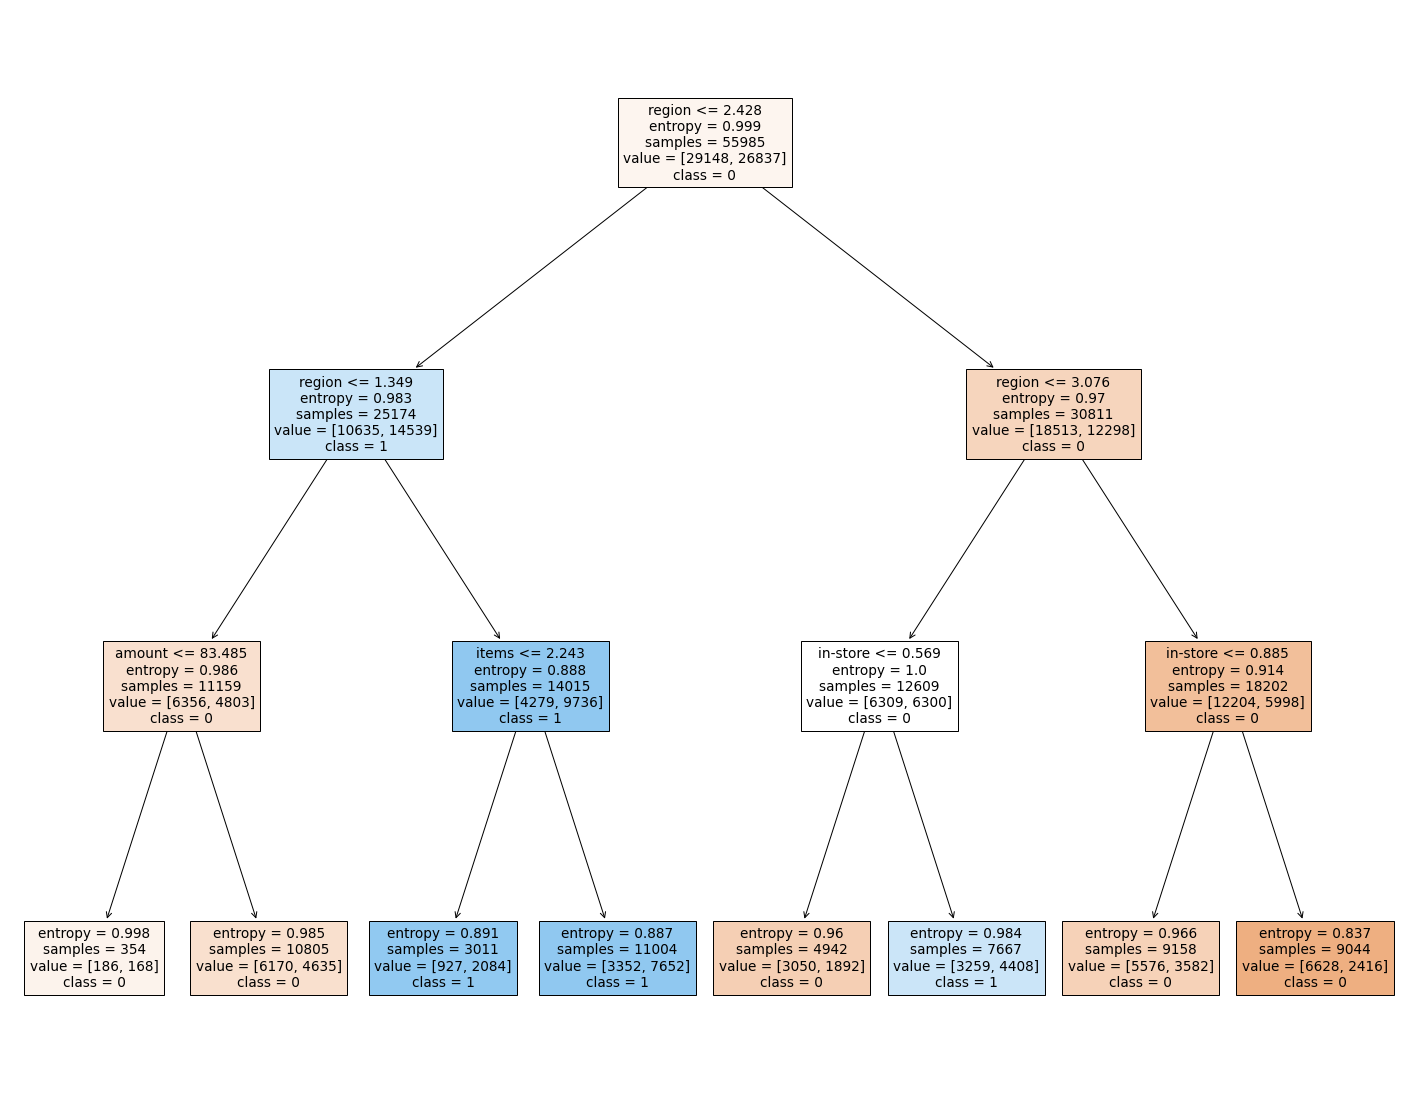

In [22]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=X.columns, class_names=['0','1','2','3'], filled=True, max_depth=11)

In [23]:
#Max depth of none doesn't halt in a timely manner, nor did 13
#Built up from max depth of 5, and 11 is about as long a time as I'm willing to take.


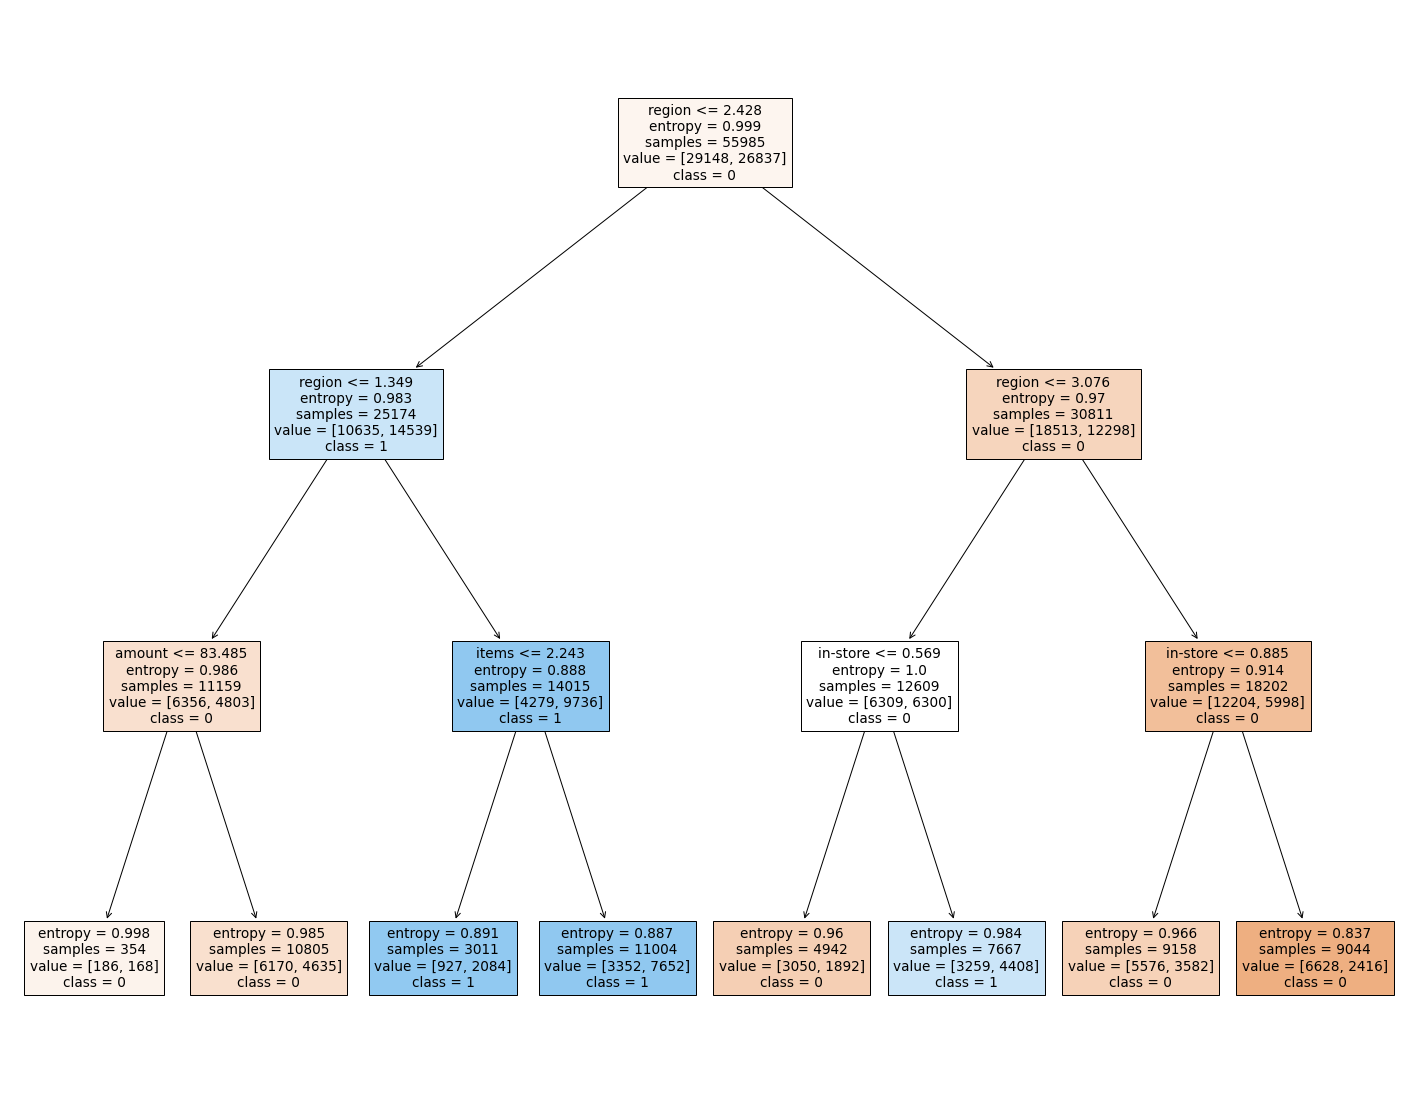

In [24]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=X.columns, class_names=['0','1','2','3'], filled=True, max_depth=3)

In [25]:
#Decision Tree classifier based on Age, predictive to about 29% with 4 age buckets (equal distro)
#Down to 13% with 10 buckets, 55% with 2, 38% with 3,100% with one bucket (test case)
#24% with 5, 21% with 6, 18% at 7...  trending down to 13% with 10. 2 age buckets (55%) seems best for Decision Tree
#passed entropy instead of gini, and got it up to 56%.  Passed gini/random, got about 56%
#entropy/random, 55%.  Entropy/random/none/5, got 55% with 63% on the younger cohort.
#gini/best/7/5 went to 63% (67% for younger); gini/best/10/2 63%; g/b/10/5 63%; e/r/3/10 64%



